# Final Capstone

## Gene Expression database mining

### Part 1. Introduction and goals; data wrangling.

## Data import and cleanup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('LUSCexpfile.csv', sep = ';') 
#print(df.head())

C:\Users\Owner\AppData\Local\Temp\ipykernel_45600\1890420037.py:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [3]:
df.columns = np.arange(len(df.columns)) 

In [4]:
print(df.head())

        0            1            2            3            4            5    \
0       NaN       normal       normal       normal       normal       normal   
1      A1BG  0.108403483  0.095187869  0.097042537   0.04302861  0.095016254   
2  A1BG-AS1  1.187325638  0.594016407  1.012277195  1.015939279  1.174120262   
3      A1CF  0.001370356  0.032045614            0            0            0   
4       A2M  459.7836081  648.0057316  444.8724975  751.7312734  1385.150034   

           6            7            8            9    ...          542  \
0       normal       normal       normal       normal  ...        tumor   
1  0.184691931  0.049553602  0.084045631  0.055256044  ...  0.212273128   
2  1.830951652   0.75448563  1.125102086  0.729134459  ...  1.017353161   
3  0.009064274  0.004770426  0.001460858            0  ...            0   
4  656.3835066  1068.335251  416.7646218   793.907885  ...  29.70095721   

           543          544          545          546          547  

In [5]:
df2 = df.T
print(df2.head())

    0            1            2            3            4            5      \
0     NaN         A1BG     A1BG-AS1         A1CF          A2M      A2M-AS1   
1  normal  0.108403483  1.187325638  0.001370356  459.7836081  0.486278098   
2  normal  0.095187869  0.594016407  0.032045614  648.0057316  1.080389631   
3  normal  0.097042537  1.012277195            0  444.8724975  1.047980517   
4  normal   0.04302861  1.015939279            0  751.7312734  0.780322401   

         6            7           8            9      ...     56898     56899  \
0        A2ML1    A2ML1-AS1   A2ML1-AS2        A2MP1  ...     ZWINT      ZXDA   
1  0.027029014            0           0  0.084772552  ...  1.665693  0.860664   
2  0.055878692  0.029601196           0   0.04022254  ...  1.358792  1.232901   
3  0.012098154            0           0  0.178337234  ...  2.645383   0.72607   
4  0.021787373  0.029335026  0.03435086  0.082568933  ...  2.286109  0.844632   

      56900     56901     56902     56903   

In [6]:
df2.loc[0, 0] = 'SampleType'  #quick fix to column header
print(df2.head())

        0            1            2            3            4      \
0  SampleType         A1BG     A1BG-AS1         A1CF          A2M   
1      normal  0.108403483  1.187325638  0.001370356  459.7836081   
2      normal  0.095187869  0.594016407  0.032045614  648.0057316   
3      normal  0.097042537  1.012277195            0  444.8724975   
4      normal   0.04302861  1.015939279            0  751.7312734   

         5            6            7           8            9      ...  \
0      A2M-AS1        A2ML1    A2ML1-AS1   A2ML1-AS2        A2MP1  ...   
1  0.486278098  0.027029014            0           0  0.084772552  ...   
2  1.080389631  0.055878692  0.029601196           0   0.04022254  ...   
3  1.047980517  0.012098154            0           0  0.178337234  ...   
4  0.780322401  0.021787373  0.029335026  0.03435086  0.082568933  ...   

      56898     56899     56900     56901     56902     56903     56904  \
0     ZWINT      ZXDA      ZXDB      ZXDC    ZYG11A  ZYG11AP1    

In [7]:
df2.columns = df2.iloc[0]

#remove first row from DataFrame
df2 = df2[1:]

#view updated DataFrame
print(df2.head())

0 SampleType         A1BG     A1BG-AS1         A1CF          A2M      A2M-AS1  \
1     normal  0.108403483  1.187325638  0.001370356  459.7836081  0.486278098   
2     normal  0.095187869  0.594016407  0.032045614  648.0057316  1.080389631   
3     normal  0.097042537  1.012277195            0  444.8724975  1.047980517   
4     normal   0.04302861  1.015939279            0  751.7312734  0.780322401   
5     normal  0.095016254  1.174120262            0  1385.150034  0.721304607   

0        A2ML1    A2ML1-AS1   A2ML1-AS2        A2MP1  ...     ZWINT      ZXDA  \
1  0.027029014            0           0  0.084772552  ...  1.665693  0.860664   
2  0.055878692  0.029601196           0   0.04022254  ...  1.358792  1.232901   
3  0.012098154            0           0  0.178337234  ...  2.645383   0.72607   
4  0.021787373  0.029335026  0.03435086  0.082568933  ...  2.286109  0.844632   
5  0.048111117            0           0  0.182329632  ...  2.400978  0.854256   

0      ZXDB      ZXDC    Z

In [8]:
print(df2.dtypes)  

0
SampleType    object
A1BG          object
A1BG-AS1      object
A1CF          object
A2M           object
               ...  
ZYG11AP1      object
ZYG11B        object
ZYX           object
ZYXP1         object
ZZEF1         object
Length: 56908, dtype: object


### Fix data type problems:

In [9]:
df2['SampleType'] = df2['SampleType'].map({'normal': 0.0, 'tumor': 1.0}) #temporarily removing the string values
pd.options.display.max_columns = 5
print(df2.head(50))

0   SampleType         A1BG  ... ZYXP1     ZZEF1
1          0.0  0.108403483  ...   0.0  4.552543
2          0.0  0.095187869  ...   0.0  5.626856
3          0.0  0.097042537  ...   0.0  2.309259
4          0.0   0.04302861  ...   0.0  5.302771
5          0.0  0.095016254  ...   0.0  5.399341
6          0.0  0.184691931  ...   0.0  5.538256
7          0.0  0.049553602  ...   0.0  4.099797
8          0.0  0.084045631  ...   0.0   4.20028
9          0.0  0.055256044  ...   0.0  6.300417
10         0.0   0.11879959  ...   0.0  6.482868
11         0.0  0.233579579  ...   0.0  6.754923
12         0.0  0.074725214  ...   0.0  5.522444
13         0.0  0.088147982  ...   0.0  3.728021
14         0.0  0.082127798  ...   0.0  5.299801
15         0.0  0.092215664  ...   0.0  5.676879
16         0.0  0.194815279  ...   0.0  5.329231
17         0.0  0.123645772  ...   0.0  2.989586
18         0.0  0.079961586  ...   0.0  4.132045
19         0.0  0.050850568  ...   0.0  2.772167
20         0.0   0.1

In [10]:
df3=df2.convert_dtypes()
print(df3.dtypes)

0
SampleType             Int64
A1BG          string[python]
A1BG-AS1      string[python]
A1CF          string[python]
A2M           string[python]
                   ...      
ZYG11AP1             Float64
ZYG11B               Float64
ZYX                  Float64
ZYXP1                Float64
ZZEF1                Float64
Length: 56908, dtype: object


Some of these didn't convert properly, so let's fix that.

In [11]:
df4=df3.astype(float)
print(df4.dtypes)

0
SampleType    float64
A1BG          float64
A1BG-AS1      float64
A1CF          float64
A2M           float64
               ...   
ZYG11AP1      float64
ZYG11B        float64
ZYX           float64
ZYXP1         float64
ZZEF1         float64
Length: 56908, dtype: object


This completes the first round of cleanup; more may be done as we proceed.

### Initial data exploration

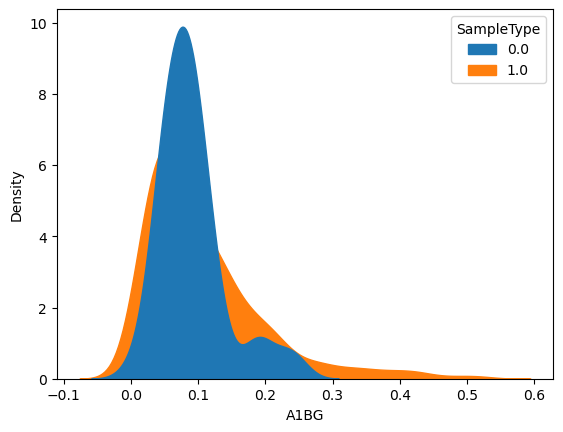

In [14]:
import seaborn as sns
# Here I could also plot a histogram but these are nicer...!
sns.kdeplot(data=df4, x='A1BG', hue="SampleType", fill=True, common_norm=False, alpha=1)  #just picked a random gene for illustration
plt.show()


In [15]:
print(df4['A1BG'].min())

0.0


In [16]:
print(df4['A1BG'].sort_values())

252    0.000000
500    0.000000
432    0.004394
440    0.005298
447    0.007775
         ...   
386    0.425880
316    0.443253
215    0.477096
360    0.505444
424    0.518196
Name: A1BG, Length: 551, dtype: float64


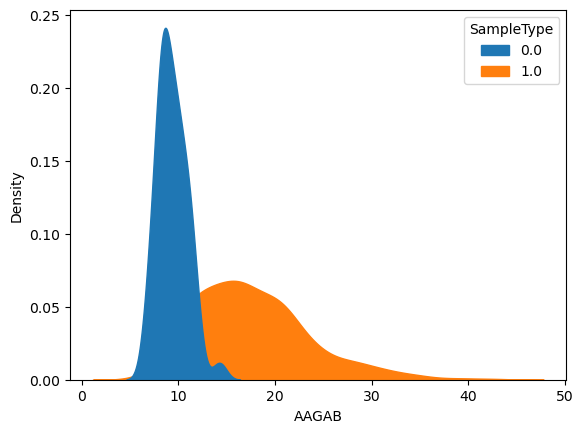

In [17]:
sns.kdeplot(data=df4, x='AAGAB', hue="SampleType", fill=True, common_norm=False, alpha=1)
plt.show()

It may be important to know how many genes are expressed at null as we proceed with the analysis:

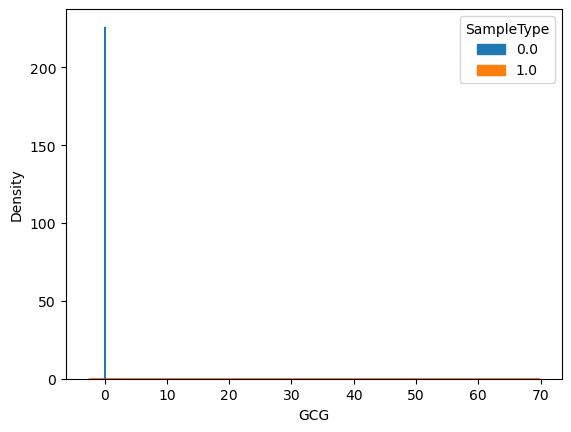

In [18]:
sns.kdeplot(data=df4, x='GCG', hue="SampleType", fill=True, common_norm=False, alpha=1)
plt.show()

Here it appears we have almost no activity for normal, but broad activity in the tumor type.  We will have to address the matter of low or no gene activity in normal samples.

In [19]:
grouped_raw = df4.groupby('SampleType')  #Here we see, for instance, ZYXP1 is not being expressed for either sample type.
print(grouped_raw.head()) 

0   SampleType      A1BG  ...  ZYXP1     ZZEF1
1          0.0  0.108403  ...    0.0  4.552543
2          0.0  0.095188  ...    0.0  5.626856
3          0.0  0.097043  ...    0.0  2.309259
4          0.0  0.043029  ...    0.0  5.302771
5          0.0  0.095016  ...    0.0  5.399341
50         1.0  0.064199  ...    0.0  1.506340
51         1.0  0.023191  ...    0.0  3.548103
52         1.0  0.039013  ...    0.0  1.999125
53         1.0  0.095058  ...    0.0  4.715684
54         1.0  0.024949  ...    0.0  4.604486

[10 rows x 56908 columns]


We should check on the total activity by sample type:  are there still genes with null expression?

In [20]:
gene_activity = grouped_raw.sum()
pd.options.display.max_columns = 5
print(gene_activity)

0                A1BG    A1BG-AS1  ...     ZYXP1        ZZEF1
SampleType                         ...                       
0.0          4.399017   46.155635  ...  0.000000   242.497597
1.0         53.455919  415.002253  ...  1.730455  1570.635163

[2 rows x 56907 columns]


Apparently so. 

## Normalization discussion and treatment of zeroes in the dataset

In [21]:
df5 = df4.add(1e-6)
logdf = np.log2(df5) 
print(logdf.head())

0  SampleType      A1BG  ...      ZYXP1     ZZEF1
1  -19.931569 -3.205504  ... -19.931569  2.186673
2  -19.931569 -3.393063  ... -19.931569  2.492329
3  -19.931569 -3.365224  ... -19.931569  1.207431
4  -19.931569 -4.538526  ... -19.931569  2.406747
5  -19.931569 -3.395667  ... -19.931569  2.432784

[5 rows x 56908 columns]


In [22]:
logdf['SampleType']=df4['SampleType'] #here we made sure sample type was ok.
print(logdf.head())

0  SampleType      A1BG  ...      ZYXP1     ZZEF1
1         0.0 -3.205504  ... -19.931569  2.186673
2         0.0 -3.393063  ... -19.931569  2.492329
3         0.0 -3.365224  ... -19.931569  1.207431
4         0.0 -4.538526  ... -19.931569  2.406747
5         0.0 -3.395667  ... -19.931569  2.432784

[5 rows x 56908 columns]


In [23]:
grouped = logdf.groupby('SampleType')
avg_exp = grouped.mean()
pd.options.display.max_columns = 5
print(avg_exp)

0               A1BG  A1BG-AS1  ...      ZYXP1     ZZEF1
SampleType                      ...                     
0.0        -3.678356 -0.181150  ... -19.931569  2.251051
1.0        -3.750148 -0.658819  ... -19.890288  1.508643

[2 rows x 56907 columns]


In [24]:
std_exp = grouped.std()
pd.options.display.max_columns = 5
print(std_exp)

0               A1BG  A1BG-AS1  ...   ZYXP1     ZZEF1
SampleType                      ...                  
0.0         0.817152  0.534636  ...  0.0000  0.432589
1.0         1.582747  1.106743  ...  0.9249  0.667813

[2 rows x 56907 columns]


In [25]:
exp_stats = pd.concat([avg_exp, std_exp], axis=0)   #there might be more elegant ways to do this, but this worked easily
pd.options.display.max_columns = 5
print(exp_stats)

0               A1BG  A1BG-AS1  ...      ZYXP1     ZZEF1
SampleType                      ...                     
0.0        -3.678356 -0.181150  ... -19.931569  2.251051
1.0        -3.750148 -0.658819  ... -19.890288  1.508643
0.0         0.817152  0.534636  ...   0.000000  0.432589
1.0         1.582747  1.106743  ...   0.924900  0.667813

[4 rows x 56907 columns]


In [26]:
#Now I'd like to transpose and then compare and sort based on std
finaldf = exp_stats.T
print(finaldf.head())

SampleType        0.0        1.0       0.0       1.0
0                                                   
A1BG        -3.678356  -3.750148  0.817152  1.582747
A1BG-AS1    -0.181150  -0.658819  0.534636  1.106743
A1CF       -12.826603 -11.492063  5.785683  5.886855
A2M          9.506983   5.746430  0.559679  1.281895
A2M-AS1     -0.314353  -0.910212  0.416750  0.937864


In [27]:
finaldf.shape  #just checking

(56907, 4)

In [28]:
#Let's rename columns now...
new_col_names = ['Norm_mean', 'Tumor_mean', 'Norm_std','Tumor_std']
finaldf.columns = new_col_names
print(finaldf.head())

          Norm_mean  Tumor_mean  Norm_std  Tumor_std
0                                                   
A1BG      -3.678356   -3.750148  0.817152   1.582747
A1BG-AS1  -0.181150   -0.658819  0.534636   1.106743
A1CF     -12.826603  -11.492063  5.785683   5.886855
A2M        9.506983    5.746430  0.559679   1.281895
A2M-AS1   -0.314353   -0.910212  0.416750   0.937864


In [29]:
#and reset the index:
finaldf=finaldf.reset_index()
print(finaldf.head())

          0  Norm_mean  Tumor_mean  Norm_std  Tumor_std
0      A1BG  -3.678356   -3.750148  0.817152   1.582747
1  A1BG-AS1  -0.181150   -0.658819  0.534636   1.106743
2      A1CF -12.826603  -11.492063  5.785683   5.886855
3       A2M   9.506983    5.746430  0.559679   1.281895
4   A2M-AS1  -0.314353   -0.910212  0.416750   0.937864


In [30]:
#now, fix that new first column and call it NAME
new_col_names = ['NAME', 'Norm_mean', 'Tumor_mean', 'Norm_std','Tumor_std']
finaldf.columns=new_col_names
print(finaldf.head())

       NAME  Norm_mean  Tumor_mean  Norm_std  Tumor_std
0      A1BG  -3.678356   -3.750148  0.817152   1.582747
1  A1BG-AS1  -0.181150   -0.658819  0.534636   1.106743
2      A1CF -12.826603  -11.492063  5.785683   5.886855
3       A2M   9.506983    5.746430  0.559679   1.281895
4   A2M-AS1  -0.314353   -0.910212  0.416750   0.937864


### Summary:  we now have two new dataframes that will be useful as we proceed.
1) finaldf:  this dataframe contains the mean and standard deviation for each gene, grouped by sample type.
2) logdf:  this dataframe contains the log of expression values, for which 1e-6 was added to avoid zero mean values

All genes are included in these two dataframes.

### Calculating ratios, filtering and sorting

In [31]:
finaldf['stdratio'] = finaldf['Tumor_std']/finaldf['Norm_std']

In [32]:
print(finaldf.head(20))

           NAME  Norm_mean  ...  Tumor_std  stdratio
0          A1BG  -3.678356  ...   1.582747  1.936906
1      A1BG-AS1  -0.181150  ...   1.106743  2.070087
2          A1CF -12.826603  ...   5.886855  1.017487
3           A2M   9.506983  ...   1.281895  2.290412
4       A2M-AS1  -0.314353  ...   0.937864  2.250421
5         A2ML1  -5.701023  ...   3.281357  1.018108
6     A2ML1-AS1 -17.154222  ...   7.158587  1.208757
7     A2ML1-AS2 -18.986202  ...   4.942538  1.320596
8         A2MP1  -3.503619  ...   3.405242  3.940431
9       A3GALT2  -5.213303  ...   7.039031  2.155943
10       A4GALT   2.903878  ...   1.354900  2.298174
11        A4GNT  -4.067244  ...   6.174987  1.750156
12         AAAS   2.712468  ...   0.456013  1.796454
13         AACS   0.744734  ...   0.657045  2.544588
14       AACSP1  -5.748758  ...   5.869836  1.493969
15        AADAC   2.132542  ...   2.821134  2.182188
16      AADACL2  -9.618874  ...   5.941547  0.885836
17  AADACL2-AS1  -6.144172  ...   5.981093  0.

## Biological reasons for narrowing down our feature search

In [33]:
finaldf.sort_values(by=['stdratio'], ascending=False).nlargest(15,'stdratio')

,NAME,Norm_mean,...,Tumor_std,stdratio
13246,AL031584.1,-19.931569,...,2.239269,inf
44269,RN7SKP267,-19.931569,...,3.898363,inf
44282,RN7SKP28,-19.931569,...,4.132280,inf
44281,RN7SKP279,-19.931569,...,1.514959,inf
44280,RN7SKP278,-19.931569,...,0.823488,inf
44279,RN7SKP277,-19.931569,...,4.126881,inf
44273,RN7SKP270,-19.931569,...,1.053577,inf
9618,AC105081.1,-19.931569,...,3.503421,inf
44272,RN7SKP27,-19.931569,...,1.523444,inf
44268,RN7SKP266,-19.931569,...,3.803292,inf


We will fix the 'inf' values seen in this table in the next few steps.

As noted earlier some genes aren't being expressed in normal, healthy patient samples.

That said, many sequences in this array database are not genes, per se.  For instance, some of the above (anything with MIR as a prefix) are micro-rnas, which don't code for proteins directly, but are involved in regulating gene expression.  These will be removed from consideration.  Others, like RNArSP332, are pseudogenes (a nonfunctional segment that looks like a functional gene but can't code for a protein).  Still others, like RF00322, are small nucleolar RNAs and are involved in regulation of transcription factors.  Ultimately, rather than analyze all these, the goal will be to eliminate all but the genes coding for proteins.  In Section 2 we will further filter candidate genes based on annotations of their function (where known or predicted).

In [34]:
filtered_final = finaldf[finaldf['Norm_std'] > 1e-6]  #adding a tiny value to avoid NANs later
filtered_final.sort_values(by=['stdratio'], ascending=False).nlargest(50,'stdratio')

,NAME,Norm_mean,...,Tumor_std,stdratio
39821,PGM5P4,0.501840,...,7.792972,14.249742
46064,RNU5B-4P,0.449240,...,8.969577,12.597440
14319,AL136452.1,1.328496,...,8.283594,12.526865
39820,PGM5P3-AS1,-2.623688,...,7.273343,12.189945
39822,PGM5P4-AS1,-2.306742,...,7.446278,11.753980
13008,AL008733.1,-0.548366,...,8.332124,11.667950
27111,GLOD5,0.021836,...,5.129703,11.483851
27080,GKN2,4.736892,...,6.978927,11.264977
12715,AF186192.1,-1.183763,...,7.107154,11.247891
13731,AL109741.3,-0.741398,...,7.162730,11.117462


In [35]:
filtered_final.shape

(49604, 6)

### Summary

Now it is clear that a lot of genes weren't being expressed in the normal samples (about 7000 or so).  These were filtered out indirectly: we could have removed genes for which Norm_mean was zero, but those genes would also have a standard deviation of zero.  Either way, they are no longer included in the analysis.

## Informing feature selection

Most oncogenes are NOT specific to a particular cancer, and because it is so important to know if a tumor is primary or secondary, the search for truly unique oncogenes that are only expressed in one, or a handful of related cancer types, is very useful.  Certain oncogenes may thus be rejected for use in the final model, due to lack of specificity, but we will analyze this more in depth after we have added annotations.

As noted earlier there are more non-coding transcripts to be excluded as well.  For instance:

Certain LincRNAs are upregulated in 13 cancers--above we see a number of them strongly upregulated.  See also 'The functions and unique features of long intergenic non-coding RNA'
Julia D. Ransohoff,1 Yuning Wei,1 and Paul A. Khavari1,2  in Nat Rev Mol Cell Biol. Author manuscript; available in PMC 2018 Apr 6.
Published in final edited form as:
Nat Rev Mol Cell Biol. 2018 Mar; 19(3): 143–157.
Published online 2017 Nov 15. doi: 10.1038/nrm.2017.104

## Conclusions:  LUSC dataset wrangling

At first glance we can see some strong differences in expression variance between normal and tumor genes; that said, we have some 57000 genes in the dataset, and while we have gene names, we don't have functions.  Adding gene function information is essential in understanding what may be actually significant versus random noise.  Recall that, by conservative estimates, 51.8% of the human genome is transcribed, but only 1.2% encodes proteins!  As a path forward, while it is interesting to note what is going on with LINCrnas and other non-protein coding RNAs, it will be essential from an analysis standpoint to narrow the array data to protein-coding genes that are active in healthy lung tissue samples.

In the next section we add gene annotations, and attempt to downselect to roughly 25 genes *based entirely on biological considerations for normal activity*, that is, we will strenuously avoid using direct knowledge of tumor data as we choose candidate genes. The model will use these to predict tumor vs normal.  (We can also compare performance with sets of *known* oncogenes or biomarkers of disease as predictors).


## 2. Data wrangling, continued: Adding gene annotations to narrow down feature selection

Now we will use annotations of human genes from the following source: https://www.alliancegenome.org/downloads#gene-descriptions
which was found through this article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7304461/ on automated gene annotation.

The file will need to be parsed and then matched to existing genes in the expression database.  The high level goal is to select a relatively small number of human genes--preferably related to healthy lung cell function--so that the use of expression data is properly limited to prevent overfitting, and hopefully, to improve the explainability of the model.  The compressed file was downloaded and unzipped to the working directory. 

In [36]:
import os
current_path = os.getcwd()
print(current_path)

os.listdir()

C:\Users\Owner\Downloads\archive (3)


['.ipynb_checkpoints',
 'GENE-DESCRIPTION-JSON_HUMAN.json',
 'GENE-DESCRIPTION-TSV_HUMAN.tsv',
 'GENE-DES_HUMAN.txt',
 'LUSCexpfile.csv',
 'LUSC_TLK.ipynb']

To read a TSV (Tab-Separated Values) file into a pandas DataFrame, you can use the pd.read_csv() function with the sep parameter set to ‘\t’ to specify that the file is tab-separated:

In [37]:
#let's try it.
Annot_df = pd.read_csv('GENE-DESCRIPTION-TSV_HUMAN.tsv', skiprows=14, sep='\t', names =['CODE', 'NAME', 'DESCRIPTION'])
print(Annot_df.head())

         CODE   NAME                                        DESCRIPTION
0    HGNC:100  ASIC1  Enables pH-gated monoatomic ion channel activi...
1  HGNC:10000   RGS4  Predicted to enable GTPase activator activity;...
2  HGNC:10001   RGS5  Predicted to enable GTPase activator activity ...
3  HGNC:10002   RGS6  Enables GTPase activator activity. Predicted t...
4  HGNC:10003   RGS7  Enables G-protein alpha-subunit binding activi...


In [38]:
#what have we here...
Annot_df.shape

(43404, 3)

The goal now is to pull only those rows where the description includes the word 'Lung'.  Note that there are genes for which there is 'no description available'.  Those, perhaps, can be examined separately, if time permits.

In [39]:
filtered_df = Annot_df[Annot_df["DESCRIPTION"].str.contains("lung")]
print(filtered_df.head())

           CODE   NAME                                        DESCRIPTION
263   HGNC:1033   BDNF  Predicted to enable growth factor activity and...
375  HGNC:10451   RRM1  Enables identical protein binding activity and...
376  HGNC:10452   RRM2  Predicted to enable ribonucleoside-diphosphate...
390  HGNC:10471  RUNX1  Enables several functions, including DNA-bindi...
391  HGNC:10472  RUNX2  Enables sequence-specific double-stranded DNA ...


In [40]:
filtered_df.shape

(425, 3)

Excellent!  The total number of genes is much more manageable now, and we can filter further.

We will proceed by matching with the 'finaldf' which may contain genes with zero expression in normal samples--this is a note of caution.

In [41]:
print(finaldf.head())

       NAME  Norm_mean  ...  Tumor_std  stdratio
0      A1BG  -3.678356  ...   1.582747  1.936906
1  A1BG-AS1  -0.181150  ...   1.106743  2.070087
2      A1CF -12.826603  ...   5.886855  1.017487
3       A2M   9.506983  ...   1.281895  2.290412
4   A2M-AS1  -0.314353  ...   0.937864  2.250421

[5 rows x 6 columns]


In [42]:
merged_df = pd.merge(finaldf, filtered_df, on='NAME', how='right') 
print(merged_df.head())

    NAME  Norm_mean  ...        CODE  \
0   BDNF  -0.078699  ...   HGNC:1033   
1   RRM1   3.111166  ...  HGNC:10451   
2   RRM2  -0.078324  ...  HGNC:10452   
3  RUNX1   2.695032  ...  HGNC:10471   
4  RUNX2  -0.255691  ...  HGNC:10472   

                                         DESCRIPTION  
0  Predicted to enable growth factor activity and...  
1  Enables identical protein binding activity and...  
2  Predicted to enable ribonucleoside-diphosphate...  
3  Enables several functions, including DNA-bindi...  
4  Enables sequence-specific double-stranded DNA ...  

[5 rows x 8 columns]


In [43]:
merged_df.shape

(425, 8)

All of the genes matched.  Perhaps some are inactive in the normal tissue.  We can filter as before to check:

In [44]:
filtered_merged = merged_df[merged_df['Norm_std'] > 1e-6]  
filtered_merged.shape

(406, 8)

Ok:  19 genes off the list.  At this point we have gone through several iterations of the dataframe, and it is worth summarizing what we have.

### Summary of current dataframes:

filtered_merged:  This dataframe contains ONLY lung genes with non-zero expression in normal tissue, plus annotations and summary statistics.
logdf:  this dataframe contains the log expression values (with 1e-6 added), which will be needed in our analysis.

### More filtering:
We don't want to include KNOWN biomarkers of disease, so let's remove those from consideration: 

In [45]:
possible_targets = filtered_merged[~filtered_merged["DESCRIPTION"].str.contains("Biomarker")]
print(possible_targets.head(50))

           NAME  Norm_mean  ...        CODE  \
18         SDHC   2.252911  ...  HGNC:10682   
27        SHOX2  -5.147524  ...  HGNC:10854   
28         SIM2  -2.986670  ...  HGNC:10883   
50      SULT1A1   2.343635  ...  HGNC:11453   
51         TBX4   3.392331  ...  HGNC:11603   
52        DAGLA   0.729317  ...   HGNC:1165   
65        TRPC4  -1.367478  ...  HGNC:12336   
74         ZIC3 -16.524010  ...  HGNC:12874   
75       ZNF157  -4.162069  ...  HGNC:12942   
89       CHRNA9  -6.707083  ...  HGNC:14079   
91          CIC   3.277328  ...  HGNC:14214   
105       RTEL1  -2.851685  ...  HGNC:15888   
108       NCOA6   2.381360  ...  HGNC:15936   
136     NKIRAS2   2.731888  ...  HGNC:17898   
137     NKIRAS1   1.523857  ...  HGNC:17899   
139       CMPK1   5.360355  ...  HGNC:18170   
140       ASXL1   3.033214  ...  HGNC:18318   
147       DPPA2 -17.706303  ...  HGNC:19197   
148       DPPA4  -7.029122  ...  HGNC:19200   
153       RXFP1   0.675455  ...  HGNC:19718   
157       TRP

In [46]:
possible_targets.shape

(58, 8)

Ok now we are down to 58 candidate genes.  Let's remove the known genes where the description includes 'Enables'.

The reason for this step is two-fold.  First, we'd like to get the number of variables down to roughly 25; secondly, we'd like to avoid using known genes (in the hopes that some biomarker discovery is a useful byproduct of the analysis).

In [47]:
final_targets = possible_targets[~possible_targets["DESCRIPTION"].str.contains("Enables")]
print(final_targets.head(50))

           NAME  Norm_mean  ...        CODE  \
18         SDHC   2.252911  ...  HGNC:10682   
27        SHOX2  -5.147524  ...  HGNC:10854   
28         SIM2  -2.986670  ...  HGNC:10883   
51         TBX4   3.392331  ...  HGNC:11603   
52        DAGLA   0.729317  ...   HGNC:1165   
75       ZNF157  -4.162069  ...  HGNC:12942   
91          CIC   3.277328  ...  HGNC:14214   
136     NKIRAS2   2.731888  ...  HGNC:17898   
137     NKIRAS1   1.523857  ...  HGNC:17899   
140       ASXL1   3.033214  ...  HGNC:18318   
147       DPPA2 -17.706303  ...  HGNC:19197   
148       DPPA4  -7.029122  ...  HGNC:19200   
157       TRPC7 -18.928888  ...  HGNC:20754   
162       STK40   4.139050  ...  HGNC:21373   
169        COPA   5.114477  ...   HGNC:2230   
181     TMEM38B   1.197102  ...  HGNC:25535   
188      CCDC40  -0.174904  ...  HGNC:26090   
190     CCDC116  -3.821066  ...  HGNC:26688   
193       MPZL3   2.652505  ...  HGNC:27279   
229      MIR367 -18.432784  ...  HGNC:31781   
243      SNHG

In [48]:
#Looking a lot better.  That said, consider row 190: 'Implicated in lung cancer'. We should apply another filter:
final_targets2 = final_targets[~final_targets["DESCRIPTION"].str.contains("cancer")]
print(final_targets2.head(50))

        NAME  Norm_mean  ...        CODE  \
18      SDHC   2.252911  ...  HGNC:10682   
28      SIM2  -2.986670  ...  HGNC:10883   
51      TBX4   3.392331  ...  HGNC:11603   
75    ZNF157  -4.162069  ...  HGNC:12942   
91       CIC   3.277328  ...  HGNC:14214   
136  NKIRAS2   2.731888  ...  HGNC:17898   
137  NKIRAS1   1.523857  ...  HGNC:17899   
140    ASXL1   3.033214  ...  HGNC:18318   
147    DPPA2 -17.706303  ...  HGNC:19197   
148    DPPA4  -7.029122  ...  HGNC:19200   
162    STK40   4.139050  ...  HGNC:21373   
169     COPA   5.114477  ...   HGNC:2230   
181  TMEM38B   1.197102  ...  HGNC:25535   
188   CCDC40  -0.174904  ...  HGNC:26090   
229   MIR367 -18.432784  ...  HGNC:31781   
243   SNHG20   0.124062  ...  HGNC:33099   
245   ATXN1L   2.987904  ...  HGNC:33279   
250    CFC1B -18.581555  ...  HGNC:33983   
285   FENDRR   2.784248  ...  HGNC:43894   
339    LAMA3   3.410678  ...   HGNC:6483   
348   MAN1A2   2.360571  ...   HGNC:6822   
349   MAN2A1   1.996711  ...   H

Now the dataset is approaching a small enough number to work with.  The other seven genes can be held out for now, and added back later if needed.

In [49]:
final_targets3 = final_targets[final_targets["DESCRIPTION"].str.contains("cancer")]
print(final_targets3.head(50))

           NAME  Norm_mean  ...        CODE  \
27        SHOX2  -5.147524  ...  HGNC:10854   
52        DAGLA   0.729317  ...   HGNC:1165   
157       TRPC7 -18.928888  ...  HGNC:20754   
190     CCDC116  -3.821066  ...  HGNC:26688   
193       MPZL3   2.652505  ...  HGNC:27279   
271  MIRLET7BHG  -1.572545  ...  HGNC:37189   
407     PPP2R1B   2.077881  ...   HGNC:9303   

                                           DESCRIPTION  
27   Predicted to enable DNA-binding transcription ...  
52   Predicted to enable lipoprotein lipase activit...  
157  Predicted to enable inositol 1,4,5 trisphospha...  
190  Located in centrosome. Implicated in lung cancer.  
193  Predicted to be involved in cell adhesion. Pre...  
271  Predicted to be involved in miRNA-mediated pos...  
407  Predicted to enable protein phosphatase regula...  

[7 rows x 8 columns]


## Finalizing predictor gene sets

After merging the gene expression data with gene annotations, and filtering to include only genes active in normal lung tissue, removing those known to be biomarkers of disease, and separating those already implicated in cancer, we arrived at two datasets.
The first contains 24 genes with some predicted functions; the second set contains 7 which are implicated in lung cancer.  We will use the second set as needed if the performance of the first set is weak.

Another note of caution on the gene set we have now.  Many of them are predicted to play some role in carcinomas:

In [50]:
slim_final=final_targets2[~final_targets2["DESCRIPTION"].str.contains("carcinoma")]
print(slim_final.head())

        NAME  Norm_mean  ...        CODE  \
28      SIM2  -2.986670  ...  HGNC:10883   
51      TBX4   3.392331  ...  HGNC:11603   
75    ZNF157  -4.162069  ...  HGNC:12942   
91       CIC   3.277328  ...  HGNC:14214   
136  NKIRAS2   2.731888  ...  HGNC:17898   

                                           DESCRIPTION  
28   Predicted to enable DNA-binding transcription ...  
51   Predicted to enable DNA-binding transcription ...  
75   Predicted to enable DNA-binding transcription ...  
91   Predicted to enable DNA-binding transcription ...  
136  Predicted to enable GTPase activating protein ...  

[5 rows x 8 columns]


Again, this is something we may return to later. As an aside, MPZL3 is involved in cell adhesion--we speculate its role could be akin to a virulence factor, where (mal)expression of that gene leads to poor cell adherence and thus metastatic cancer.  And finally--one more look at what the annotations are telling us:

In [52]:
other_targets = possible_targets[possible_targets["DESCRIPTION"].str.contains("carcinoma")]  #how many of these have 'carcinoma' in them
print(other_targets.head(50))

       NAME  Norm_mean  ...        CODE  \
18     SDHC   2.252911  ...  HGNC:10682   
89   CHRNA9  -6.707083  ...  HGNC:14079   
105   RTEL1  -2.851685  ...  HGNC:15888   
139   CMPK1   5.360355  ...  HGNC:18170   
158    PAOX   1.126756  ...  HGNC:20837   
208   STRAP   5.229397  ...  HGNC:30796   
243  SNHG20   0.124062  ...  HGNC:33099   
263     FES   3.069147  ...   HGNC:3657   
268      FH   4.173180  ...   HGNC:3700   
306  HS3ST2   1.973635  ...   HGNC:5195   
339   LAMA3   3.410678  ...   HGNC:6483   
357     MAX   3.776226  ...   HGNC:6913   
359    MBD4   3.346776  ...   HGNC:6919   
375    MSH3   1.624633  ...   HGNC:7326   
376    MSH5  -2.524527  ...   HGNC:7328   
381    NAT2  -3.506457  ...   HGNC:7646   
416   PTPRJ   2.675292  ...   HGNC:9673   
420    RARB   1.370408  ...   HGNC:9865   

                                           DESCRIPTION  
18   Predicted to enable heme binding activity. Pre...  
89   Enables acetylcholine-gated monoatomic cation-...  
105  Enable

## Section 2 summary and conclusion

We will now proceed to analyze 'final_targets2' which contains the genes matching the following filtering criteria:
--active in normal lung tissue
--genes with potential for bio marker discovery (that is, not known biomarkers of cancer or other disease, though some may be suspected to play a role in cancer or carcinomas)
--genes with predicted functions (not unknown, but also not definitively characterized).

We also have additional 'short lists'  and variations of the key set, above, which may be experimented on as we explore models later.

At this stage we have a small enough set of target genes to proceed with EDA, preprocessing, and model building.

(Finally, we note that a great many other avenues were explored, and later rejected: the above search for candidate genes is the best found so far).

# 3. EDA with candidate gene sets 

Earlier we looked at a few random genes and compared the normal vs cancer expression levels.  It would be good to do the same with the candidate genes from section 2.

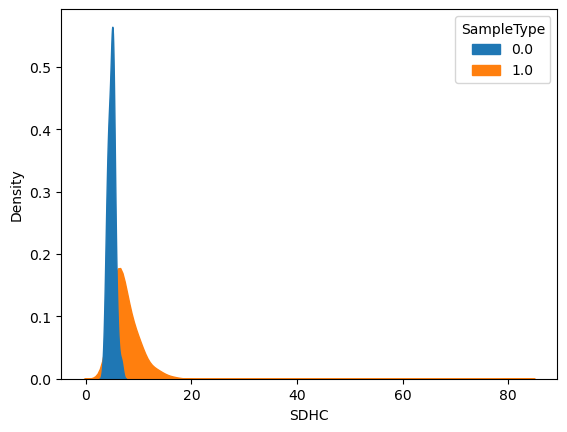

In [53]:
sns.kdeplot(data=df4, x='SDHC', hue="SampleType", fill=True, common_norm=False, alpha=1)  #just using the prior df4 dataframe
plt.show()

TBD: let's plot or list the std_ratios and mean expression differences/normal gene std.

In [54]:
#create list of candidate genes from earlier.
Gene_list = list(final_targets2['NAME'])  #I only want the names for now
print(Gene_list)

['SDHC', 'SIM2', 'TBX4', 'ZNF157', 'CIC', 'NKIRAS2', 'NKIRAS1', 'ASXL1', 'DPPA2', 'DPPA4', 'STK40', 'COPA', 'TMEM38B', 'CCDC40', 'MIR367', 'SNHG20', 'ATXN1L', 'CFC1B', 'FENDRR', 'LAMA3', 'MAN1A2', 'MAN2A1', 'MSH5', 'NAT2']


OK:  next we perform a sanity check to see what the candidate genes might be doing in normal vs tumor tissue
We have to be careful that Norm_delta does not enter the picture later in the model.  It is only for exploration.

The variable 'Norm-Delta' is the difference in mean expression for each gene between normal and tumor tissue.  In the model, we anticipate using the ratio of expression level to the NORMAL tissue type standard deviation.

In [55]:
#Next do a calculation for ALL genes, since our target list may vary
finaldf['Norm_delta'] = (finaldf['Tumor_mean'] - finaldf['Norm_mean'])/finaldf['Norm_std']
pd.set_option('display.max_columns', 1000) #now I want to see the columns more clearly
pd.set_option('display.width', 1000)
print(finaldf.head())

       NAME  Norm_mean  Tumor_mean  Norm_std  Tumor_std  stdratio  Norm_delta
0      A1BG  -3.678356   -3.750148  0.817152   1.582747  1.936906   -0.087856
1  A1BG-AS1  -0.181150   -0.658819  0.534636   1.106743  2.070087   -0.893447
2      A1CF -12.826603  -11.492063  5.785683   5.886855  1.017487    0.230663
3       A2M   9.506983    5.746430  0.559679   1.281895  2.290412   -6.719130
4   A2M-AS1  -0.314353   -0.910212  0.416750   0.937864  2.250421   -1.429774


## A brief interlude for more data wrangling before proceeding with EDA:

I want a simpler dataframe to work with, that's easier to read, etc, for analysis.  I'm going to construct an EDA dataframe, which is based on the gene list of final targets, above.

In [56]:
#ok, let's see if this helps. 
mask = finaldf['NAME'].isin(Gene_list)
EDA_data = finaldf[mask]

print(EDA_data.head(30))

          NAME  Norm_mean  Tumor_mean  Norm_std  Tumor_std  stdratio  Norm_delta
19392    ASXL1   3.033214    2.965735  0.331737   0.568385  1.713361   -0.203412
19631   ATXN1L   2.987904    2.577886  0.395435   0.585538  1.480744   -1.036879
21338   CCDC40  -0.174904   -1.459606  1.190263   1.151161  0.967149   -1.079344
22022    CFC1B -18.581555  -19.570268  4.052522   2.221798  0.548251   -0.243975
22222      CIC   3.277328    3.462740  0.442868   0.785067  1.772689    0.418660
22668     COPA   5.114477    5.545745  0.219132   0.442652  2.020019    1.968067
24278    DPPA2 -17.706303   -9.603190  5.095698   8.993804  1.764980    1.590187
24287    DPPA4  -7.029122   -7.972699  4.061045   4.782399  1.177628   -0.232348
26087   FENDRR   2.784248   -1.935167  0.890335   1.820095  2.044281   -5.300719
30921    LAMA3   3.410678    3.201375  0.699877   1.656641  2.367046   -0.299058
33596   MAN1A2   2.360571    2.624083  0.347194   0.590257  1.700078    0.758974
33601   MAN2A1   1.996711   

### Important wrangling step before we proceed:  clean up the indices in some of the dataframes from earlier

In [57]:
#Ok I will now set the index to NAME in 'finaldf' so I can pull out genes more easily
finaldf.set_index('NAME', inplace=True)
print(finaldf.head())

          Norm_mean  Tumor_mean  Norm_std  Tumor_std  stdratio  Norm_delta
NAME                                                                      
A1BG      -3.678356   -3.750148  0.817152   1.582747  1.936906   -0.087856
A1BG-AS1  -0.181150   -0.658819  0.534636   1.106743  2.070087   -0.893447
A1CF     -12.826603  -11.492063  5.785683   5.886855  1.017487    0.230663
A2M        9.506983    5.746430  0.559679   1.281895  2.290412   -6.719130
A2M-AS1   -0.314353   -0.910212  0.416750   0.937864  2.250421   -1.429774


In [58]:
#let's do that with the annotations too...
final_targets2.set_index('NAME', inplace = True)
print(final_targets2.head())

        Norm_mean  Tumor_mean  Norm_std  Tumor_std  stdratio        CODE                                        DESCRIPTION
NAME                                                                                                                       
SDHC     2.252911    2.826615  0.198894   0.459122  2.308381  HGNC:10682  Predicted to enable heme binding activity. Pre...
SIM2    -2.986670   -0.474648  0.483191   1.707957  3.534748  HGNC:10883  Predicted to enable DNA-binding transcription ...
TBX4     3.392331   -0.254923  0.705874   1.553770  2.201200  HGNC:11603  Predicted to enable DNA-binding transcription ...
ZNF157  -4.162069   -4.498144  2.581526   4.081157  1.580909  HGNC:12942  Predicted to enable DNA-binding transcription ...
CIC      3.277328    3.462740  0.442868   0.785067  1.772689  HGNC:14214  Predicted to enable DNA-binding transcription ...


In [59]:
#now once more:
EDA_data.set_index('NAME', inplace=True)

print(EDA_data.head())

        Norm_mean  Tumor_mean  Norm_std  Tumor_std  stdratio  Norm_delta
NAME                                                                    
ASXL1    3.033214    2.965735  0.331737   0.568385  1.713361   -0.203412
ATXN1L   2.987904    2.577886  0.395435   0.585538  1.480744   -1.036879
CCDC40  -0.174904   -1.459606  1.190263   1.151161  0.967149   -1.079344
CFC1B  -18.581555  -19.570268  4.052522   2.221798  0.548251   -0.243975
CIC      3.277328    3.462740  0.442868   0.785067  1.772689    0.418660


In [60]:
print(final_targets2.loc['TBX4'].values) 

[3.392331231466092 -0.2549229077671009 0.7058737641016737
 1.5537696752684174 2.2012004897870283 'HGNC:11603'
 'Predicted to enable DNA-binding transcription factor activity, RNA polymerase II-specific and RNA polymerase II cis-regulatory region sequence-specific DNA binding activity. Involved in embryonic hindlimb morphogenesis; embryonic lung development; and skeletal system morphogenesis. Predicted to be part of chromatin. Predicted to be active in nucleus. Implicated in arthropathy and ischiocoxopodopatellar syndrome.']


## Returning to EDA

In [61]:
#I want to see the ranked list of targets:
print(EDA_data.sort_values(by=['Norm_delta'], ascending=False).nlargest(20,'Norm_delta'))

         Norm_mean  Tumor_mean  Norm_std  Tumor_std  stdratio  Norm_delta
NAME                                                                     
SIM2     -2.986670   -0.474648  0.483191   1.707957  3.534748    5.198822
NKIRAS2   2.731888    3.524384  0.200198   0.458122  2.288342    3.958553
SDHC      2.252911    2.826615  0.198894   0.459122  2.308381    2.884476
COPA      5.114477    5.545745  0.219132   0.442652  2.020019    1.968067
TMEM38B   1.197102    2.058172  0.500399   1.024133  2.046632    1.720764
SNHG20    0.124062    1.054194  0.579025   0.915609  1.581294    1.606377
DPPA2   -17.706303   -9.603190  5.095698   8.993804  1.764980    1.590187
MSH5     -2.524527   -1.087734  1.105124   1.227619  1.110843    1.300119
MAN1A2    2.360571    2.624083  0.347194   0.590257  1.700078    0.758974
CIC       3.277328    3.462740  0.442868   0.785067  1.772689    0.418660
MAN2A1    1.996711    2.043456  0.343070   0.649092  1.892011    0.136256
MIR367  -18.432784  -18.957262  5.0862

In [62]:
#ok, this is useful; 4 genes have 2stds difference or more, 11 have at least 1 std difference.  I wonder what SIM2 is doing:
print(final_targets2.loc['SIM2'].values) 

[-2.986669521076872 -0.47464785040660773 0.4831905783460199
 1.7079571152546102 3.5347483825140253 'HGNC:10883'
 'Predicted to enable DNA-binding transcription factor activity, RNA polymerase II-specific and RNA polymerase II transcription regulatory region sequence-specific DNA binding activity. Predicted to be involved in regulation of transcription by RNA polymerase II. Predicted to act upstream of or within embryonic pattern specification; lung development; and negative regulation of transcription by RNA polymerase II. Located in nuclear body.']


It looks like we are on the right track; I'd like to look ata plot of the ranked absolute value of this ratio next.

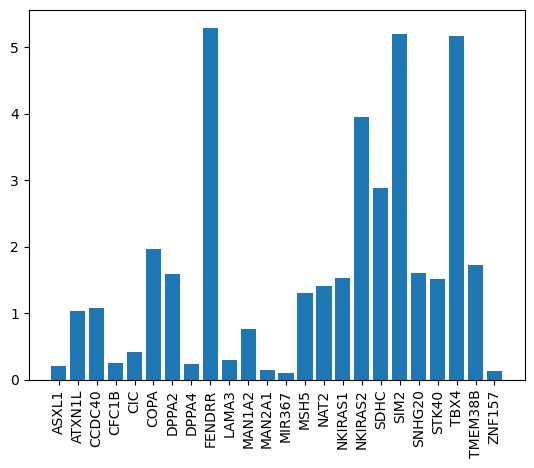

In [78]:
abs_ND = EDA_data['Norm_delta'].abs()  #Here we are comparing absolute values for easier visualization
Names = list(EDA_data.index)
plt.bar(Names, abs_ND)
plt.xticks(rotation='vertical')
plt.show()

Now we can see that many of these genes do look rather suspicious, with mean expression in tumor tissue many standard deviations out of line with the normal tissue expression levels.  In particular, FENDRR, SIM2 and TBX4 seem dramatically different in their behavior.  

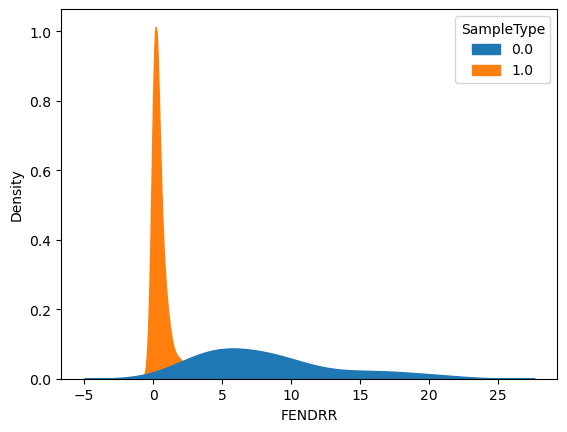

In [79]:
sns.kdeplot(data=df4, x='FENDRR', hue="SampleType", fill=True, common_norm=False, alpha=1)  #just using the prior df4 dataframe
plt.show()

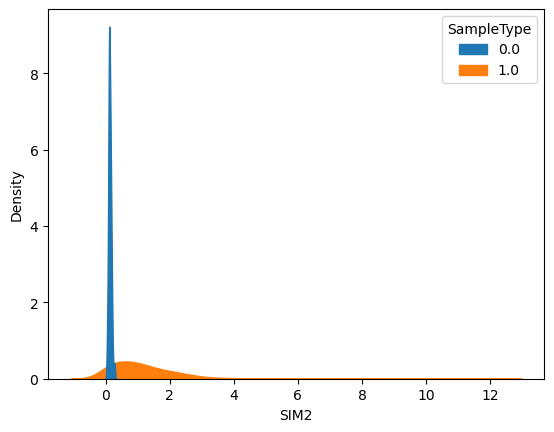

In [80]:
sns.kdeplot(data=df4, x='SIM2', hue="SampleType", fill=True, common_norm=False, alpha=1)  #just using the prior df4 dataframe
plt.show()

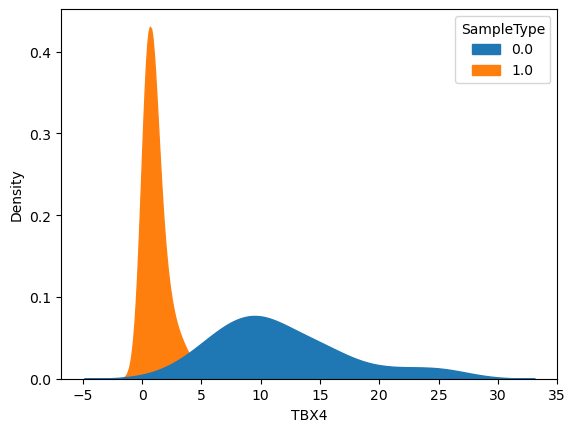

In [81]:
sns.kdeplot(data=df4, x='TBX4', hue="SampleType", fill=True, common_norm=False, alpha=1)  #just using the prior df4 dataframe
plt.show()

# Summary:  Data Wrangling and EDA

Thus far we have narrowed down our candidate gene set based on biological considerations using the annotations, and have shown that our hypothesis (that expression levels between normal and tumor tissue should differ markedly) appears to be true for most of the genes in our candidate set.  Next we will proceed with pre-processing and model development.  We may choose to add or remove some genes, but for now, will proceed with what we have found in 'final_targets2' for model development.  

Note that for the above gene set, some of the genes are suppressed in tumor tissue; TBX4, for instance (recall that '0' is normal, and '1' is tumor. SIM2 is being activated in tumors, whereas TBX4 and FENDRR are being suppressed.  We expected to see up- and down-regulation of genes for the different tissue types.

Entering this list of genes in the gene ontology resource (https://geneontology.org/) gives a number of key biological processes these genes are involved in:

1) MutSgamma complex	A heterodimer involved in the stabilization of DNA recombination intermediates, the promotion of crossover recombination, and the proper assembly of the synaptonemal complex in meiotic prophase nuclei. 

2) 	PR-DUB complex	A multimeric protein complex that removes monoubiquitin from histone H2A. In Drosophila and mammals, the core of the complex is composed of Calypso/BAP1 and Asx/ASXL1, respectively. 

3) 	Polycomb repressive deubiquitinase complex		7-dehydrocholesterol reductase activity	Catalysis of the reaction: cholesterol + NADP+ = 7-dehydrocholesterol + H+ + NADyy
 
4) 
	inferior colliculus developme.nt	The process whose specific outcome is the progression of the inferior colliculus over time, from its formation to the mature structure. The inferior colliculus (IC) (Latin, lower hill) is the principal midbrain nucleus of the auditory pathway and receives input from several more peripheral brainstem nuclei in the auditory pathway, as well as inputs from the auditory ctex.

The last is a curious find, to say the least.ss

# 4. Preprocessing (under construction)

First we need to construct the analysis dataframe, which should contain: gene name, log expression level, label (cancer/normal), normal stdev of expression and ratio of expression level/norm std, which is the variable we will model on.  Once that is done, we need to make the train/test split.  (The log of expression level was already done). There is a mismatch at this point between the number of genes (columns) in our dataframes because...

During modeling we will mask to work only with the limited set of final genes.  

Recall that 'filteredfinal' is tall and contains gene name and various stats, such as  but 'logdf' contains 57000 columns with genes, sample type, and expression values (551 rows).  THe desired final dataframe should have 551 rows; with 24 columns determined by the downselected list; each cell should have the log exp data/stdev for normal. The final column will be 'sample type' and the first (key) column will be 'NAME'.

In [290]:
print(filtered_final.head())

       NAME  Norm_mean  Tumor_mean  Norm_std  Tumor_std  stdratio
0      A1BG  -2.438014   -2.381063  0.335400   0.528722  1.576396
1  A1BG-AS1  -0.016994   -0.392295  0.475384   0.909640  1.913485
2      A1CF  -3.283804   -3.219717  0.063599   0.395336  6.216121
3       A2M   9.507198    5.750409  0.559586   1.278331  2.284421
4   A2M-AS1  -0.139210   -0.619217  0.366558   0.763418  2.082663


In [291]:
#ah.  So...ok, I want norm std from this.
temp_df = filtered_final.T
print(temp_df.head())

               0         1         2      ...     56903     56904     56906
NAME            A1BG  A1BG-AS1      A1CF  ...    ZYG11B       ZYX     ZZEF1
Norm_mean  -2.438014 -0.016994 -3.283804  ...  2.432076  6.631654  2.282536
Tumor_mean -2.381063 -0.392295 -3.219717  ...  1.983033    5.8252  1.564559
Norm_std      0.3354  0.475384  0.063599  ...  0.375555   0.35182  0.421173
Tumor_std   0.528722   0.90964  0.395336  ...  0.425208  0.680403  0.636457

[5 rows x 49604 columns]


Hey wait!  Why are there not almost the same number of columns in temp_df and filtered_final?  Shouldn't we have all the same columns?

In [ ]:
#ok, now the above has all the genes with Norm_std, which is fine; I want these to stack vertically so that the stats are at the bottom.
#combined_df = pd.concat([logdf,temp_df])  #I don't care about the index and will fix it later
#print(combined_df.head()